In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean 

In [0]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/data/lab3_train.csv')
df_train.shape

(5729, 44)

In [0]:
df_test = pd.read_csv('https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/data/lab3_test.csv')
df_test.shape

(2848, 43)

In [0]:
df_train.head()

,ID,League,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Year,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR,Result
0,GER310812#0,Germany,31/08/12,Mainz,Greuther Furth,0.555556,0.285714,0.222222,0.534759,0.285714,0.230947,0.555556,0.294118,0.250000,0.546448,0.285714,0.230947,0.537634,0.270270,0.212766,0.546448,0.285714,0.230947,0.540541,0.270270,0.217391,2.09,1.98,1.94,1.83,2013,[8.0],[3.0],[13.0],[8.0],[2.0],[0.0],[8.0],[3.0],[13.0],[8.0],[2.0],[0.0],0
1,GER010912#0,Germany,01/09/12,Fortuna Dusseldorf,M'gladbach,0.344828,0.303030,0.416667,0.333333,0.303030,0.434783,0.344828,0.322581,0.434783,0.333333,0.294118,0.434783,0.312500,0.293255,0.414938,0.333333,0.303030,0.425532,0.312500,0.294118,0.416667,2.11,2.00,1.90,1.80,2013,[9.0],[4.0],[14.0],[0.0],[2.0],[0.0],[9.0],[4.0],[14.0],[0.0],[2.0],[0.0],1
2,GER010912#1,Germany,01/09/12,Hoffenheim,Ein Frankfurt,0.487805,0.294118,0.285714,0.487805,0.303030,0.263158,0.512821,0.303030,0.277778,0.500000,0.294118,0.266667,0.480769,0.277778,0.261780,0.487805,0.294118,0.285714,0.487805,0.277778,0.263158,2.00,1.93,1.95,1.88,2013,[14.0],[8.0],[6.0],[4.0],[0.0],[0.0],[14.0],[8.0],[6.0],[4.0],[0.0],[0.0],0
3,GER010912#2,Germany,01/09/12,Leverkusen,Freiburg,0.636943,0.250000,0.181818,0.617284,0.256410,0.200000,0.645161,0.270270,0.185185,0.636943,0.266667,0.166667,0.613497,0.238095,0.170940,0.636943,0.266667,0.166667,0.617284,0.238095,0.173913,1.69,1.62,2.44,2.25,2013,[19.0],[10.0],[22.0],[7.0],[2.0],[0.0],[19.0],[10.0],[22.0],[7.0],[2.0],[0.0],2
4,GER010912#3,Germany,01/09/12,Nurnberg,Dortmund,0.166667,0.250000,0.645161,0.166667,0.250000,0.653595,0.185185,0.270270,0.645161,0.166667,0.250000,0.653595,0.162075,0.235294,0.621118,0.161290,0.250000,0.653595,0.160000,0.238095,0.636943,1.83,1.76,2.16,2.07,2013,[18.0],[8.0],[20.0],[6.0],[2.0],[0.0],[18.0],[8.0],[20.0],[6.0],[2.0],[0.0],1


In [0]:
df_test.head()

,ID,League,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Year,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR
0,ENG010117#0,Germany,09/09/16,Schalke 04,Bayern Munich,0.100000,0.181818,0.769231,0.090909,0.173913,0.769231,0.117647,0.200000,0.740741,0.100000,0.190476,0.769231,0.092251,0.169779,0.757576,0.111111,0.181818,0.769231,0.090909,0.173913,0.775194,1.61,1.55,2.62,2.38,2017,[11],[3],[15],[5],[2],[0],[11],[3],[15],[5],[2],[0]
1,ENG010117#1,Germany,10/09/16,Darmstadt,Ein Frankfurt,0.333333,0.303030,0.416667,0.333333,0.303030,0.416667,0.344828,0.312500,0.400000,0.333333,0.307692,0.434783,0.311526,0.294985,0.413223,0.357143,0.312500,0.400000,0.319489,0.294118,0.420168,2.15,2.09,1.79,1.73,2017,[12],[3],[15],[5],[3],[0],[12],[3],[15],[5],[3],[0]
2,ENG01012018#0,Germany,10/09/16,Freiburg,M'gladbach,0.277778,0.277778,0.500000,0.270270,0.277778,0.500000,0.263158,0.294118,0.500000,0.285714,0.277778,0.500000,0.264550,0.265252,0.490196,0.266667,0.312500,0.487805,0.285714,0.266667,0.487805,1.75,1.68,2.30,2.17,2017,[8],[2],[10],[2],[3],[0],[8],[2],[10],[2],[3],[0]
3,ENG01012018#1,Germany,10/09/16,Ingolstadt,Hertha,0.416667,0.322581,0.312500,0.408163,0.322581,0.322581,0.416667,0.312500,0.327869,0.416667,0.333333,0.322581,0.398406,0.318471,0.303951,0.400000,0.322581,0.344828,0.408163,0.312500,0.319489,2.66,2.47,1.60,1.53,2017,[13],[5],[15],[5],[2],[0],[13],[5],[15],[5],[2],[0]
4,ENG01012018#2,Germany,10/09/16,Leverkusen,Hamburg,0.689655,0.222222,0.142857,0.666667,0.230947,0.153846,0.645161,0.250000,0.161290,0.694444,0.230947,0.142857,0.671141,0.215054,0.132802,0.666667,0.238095,0.153846,0.689655,0.217391,0.142857,1.79,1.72,2.17,2.09,2017,[12],[6],[16],[3],[3],[0],[12],[6],[16],[3],[3],[0]


# Parte 1 - Análise exploratória dos dados

As estatísticas dos times contém valores em listas, que podem ir do jogo anterior até 5 partidas jogadas anteriormente. Por estratégia irei selecionar a média dos últimos jogos.

---



In [0]:
df_train2 = df_train.copy()

In [0]:
from ast import literal_eval

array_columns_train = df_train2[["HS", "HST", "HF", "HC", "HY", "HR", "AS", "AST", "AF", "AC", "AY", "AR"]]

for col in array_columns_train:
  df_train2[col] = df_train2[col].apply(literal_eval)

In [0]:
for index, row in df_train2.iterrows():
  for col in array_columns_train:
    df_train2.loc[index, col] = mean(df_train2.loc[index, col])


In [0]:
df_train = df_train2
df_train

,ID,League,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Year,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR,Result
0,GER310812#0,Germany,31/08/12,Mainz,Greuther Furth,0.555556,0.285714,0.222222,0.534759,0.285714,0.230947,0.555556,0.294118,0.250000,0.546448,0.285714,0.230947,0.537634,0.270270,0.212766,0.546448,0.285714,0.230947,0.540541,0.270270,0.217391,2.09,1.98,1.94,1.83,2013,8,3,13,8,2,0,8,3,13,8,2,0,0
1,GER010912#0,Germany,01/09/12,Fortuna Dusseldorf,M'gladbach,0.344828,0.303030,0.416667,0.333333,0.303030,0.434783,0.344828,0.322581,0.434783,0.333333,0.294118,0.434783,0.312500,0.293255,0.414938,0.333333,0.303030,0.425532,0.312500,0.294118,0.416667,2.11,2.00,1.90,1.80,2013,9,4,14,0,2,0,9,4,14,0,2,0,1
2,GER010912#1,Germany,01/09/12,Hoffenheim,Ein Frankfurt,0.487805,0.294118,0.285714,0.487805,0.303030,0.263158,0.512821,0.303030,0.277778,0.500000,0.294118,0.266667,0.480769,0.277778,0.261780,0.487805,0.294118,0.285714,0.487805,0.277778,0.263158,2.00,1.93,1.95,1.88,2013,14,8,6,4,0,0,14,8,6,4,0,0,0
3,GER010912#2,Germany,01/09/12,Leverkusen,Freiburg,0.636943,0.250000,0.181818,0.617284,0.256410,0.200000,0.645161,0.270270,0.185185,0.636943,0.266667,0.166667,0.613497,0.238095,0.170940,0.636943,0.266667,0.166667,0.617284,0.238095,0.173913,1.69,1.62,2.44,2.25,2013,19,10,22,7,2,0,19,10,22,7,2,0,2
4,GER010912#3,Germany,01/09/12,Nurnberg,Dortmund,0.166667,0.250000,0.645161,0.166667,0.250000,0.653595,0.185185,0.270270,0.645161,0.166667,0.250000,0.653595,0.162075,0.235294,0.621118,0.161290,0.250000,0.653595,0.160000,0.238095,0.636943,1.83,1.76,2.16,2.07,2013,18,8,20,6,2,0,18,8,20,6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,SPA150516#0,Spain,15/05/16,Betis,Getafe,0.200000,0.263158,0.588235,0.217391,0.263158,0.588235,0.208333,0.250000,0.625000,0.222222,0.263158,0.588235,0.196850,0.245700,0.578035,0.200000,0.263158,0.625000,0.200000,0.250000,0.578035,1.73,1.68,2.28,2.16,2016,9,3.2,12.6,3.8,3,0.2,9,3.2,12.6,3.8,3,0.2,2
5725,SPA150516#1,Spain,15/05/16,Espanol,Eibar,0.500000,0.277778,0.270270,0.500000,0.277778,0.294118,0.540541,0.289855,0.250000,0.512821,0.285714,0.266667,0.485437,0.273973,0.261097,0.487805,0.294118,0.307692,0.487805,0.270270,0.266667,1.76,1.70,2.23,2.12,2016,8.8,3.6,16.2,3.4,3,0,8.8,3.6,16.2,3.4,3,0,2
5726,SPA150516#2,Spain,15/05/16,Malaga,Las Palmas,0.555556,0.266667,0.222222,0.546448,0.270270,0.250000,0.540541,0.289855,0.250000,0.555556,0.277778,0.230947,0.537634,0.261097,0.222222,0.546448,0.294118,0.250000,0.540541,0.263158,0.227273,1.90,1.78,2.12,2.02,2016,14,6.2,14.8,7,2.2,0,14,6.2,14.8,7,2.2,0,2
5727,SPA150516#3,Spain,15/05/16,Sp Gijon,Villarreal,0.694444,0.222222,0.133333,0.694444,0.230947,0.142857,0.689655,0.222222,0.181818,0.694444,0.230947,0.142857,0.680272,0.213220,0.128370,0.735294,0.230947,0.125000,0.689655,0.217391,0.125000,1.87,1.81,2.09,1.98,2016,8.6,2.6,13.6,4,2.4,0.4,8.6,2.6,13.6,4,2.4,0.4,2


In [0]:
df_test2 = df_test.copy()

In [0]:
array_columns_test = df_test2[["HS", "HST", "HF", "HC", "HY", "HR", "AS", "AST", "AF", "AC", "AY", "AR"]]

for col in array_columns_test:
  df_test2[col] = df_test2[col].apply(literal_eval)

In [0]:
for index, row in df_test2.iterrows():
  for col in array_columns_test:
    df_test2.loc[index, col] = mean(df_test2.loc[index, col])

In [0]:
df_test = df_test2
df_test

,ID,League,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Year,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR
0,ENG010117#0,Germany,09/09/16,Schalke 04,Bayern Munich,0.100000,0.181818,0.769231,0.090909,0.173913,0.769231,0.117647,0.200000,0.740741,0.100000,0.190476,0.769231,0.092251,0.169779,0.757576,0.111111,0.181818,0.769231,0.090909,0.173913,0.775194,1.61,1.55,2.62,2.38,2017,11,3,15,5,2,0,11,3,15,5,2,0
1,ENG010117#1,Germany,10/09/16,Darmstadt,Ein Frankfurt,0.333333,0.303030,0.416667,0.333333,0.303030,0.416667,0.344828,0.312500,0.400000,0.333333,0.307692,0.434783,0.311526,0.294985,0.413223,0.357143,0.312500,0.400000,0.319489,0.294118,0.420168,2.15,2.09,1.79,1.73,2017,12,3,15,5,3,0,12,3,15,5,3,0
2,ENG01012018#0,Germany,10/09/16,Freiburg,M'gladbach,0.277778,0.277778,0.500000,0.270270,0.277778,0.500000,0.263158,0.294118,0.500000,0.285714,0.277778,0.500000,0.264550,0.265252,0.490196,0.266667,0.312500,0.487805,0.285714,0.266667,0.487805,1.75,1.68,2.30,2.17,2017,8,2,10,2,3,0,8,2,10,2,3,0
3,ENG01012018#1,Germany,10/09/16,Ingolstadt,Hertha,0.416667,0.322581,0.312500,0.408163,0.322581,0.322581,0.416667,0.312500,0.327869,0.416667,0.333333,0.322581,0.398406,0.318471,0.303951,0.400000,0.322581,0.344828,0.408163,0.312500,0.319489,2.66,2.47,1.60,1.53,2017,13,5,15,5,2,0,13,5,15,5,2,0
4,ENG01012018#2,Germany,10/09/16,Leverkusen,Hamburg,0.689655,0.222222,0.142857,0.666667,0.230947,0.153846,0.645161,0.250000,0.161290,0.694444,0.230947,0.142857,0.671141,0.215054,0.132802,0.666667,0.238095,0.153846,0.689655,0.217391,0.142857,1.79,1.72,2.17,2.09,2017,12,6,16,3,3,0,12,6,16,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,SPA310318#0,Spain,19/05/18,Villarreal,Real Madrid,0.322581,0.243902,0.476190,0.322581,0.238095,0.487805,0.400000,0.263158,0.400000,0.333333,0.250000,0.476190,0.328947,0.235294,0.460829,0.333333,0.238095,0.487805,0.319489,0.238095,0.476190,1.31,1.26,4.00,3.79,2018,14.8,6.4,13.2,5.2,2.2,0,14.8,6.4,13.2,5.2,2.2,0
2844,SPA310318#1,Spain,20/05/18,Ath Bilbao,Espanol,0.490196,0.285714,0.277778,0.500000,0.285714,0.263158,0.500000,0.277778,0.277778,0.500000,0.285714,0.285714,0.487805,0.267380,0.271003,0.476190,0.294118,0.285714,0.500000,0.270270,0.277778,1.82,1.75,2.16,2.06,2018,12,3.8,14.8,4.6,3.6,0,12,3.8,14.8,4.6,3.6,0
2845,SPA310318#2,Spain,20/05/18,Ath Madrid,Eibar,0.621118,0.263158,0.166667,0.625000,0.250000,0.173913,0.606061,0.270270,0.181818,0.625000,0.256410,0.181818,0.625000,0.239808,0.161812,0.617284,0.263158,0.181818,0.636943,0.243902,0.173913,1.87,1.82,2.06,1.98,2018,9.4,3.2,13.6,5.2,2.2,0.2,9.4,3.2,13.6,5.2,2.2,0.2
2846,SPA310318#3,Spain,20/05/18,Barcelona,Sociedad,0.819672,0.142857,0.090909,0.819672,0.137931,0.095238,0.769231,0.181818,0.105263,0.819672,0.153846,0.105263,0.800000,0.132802,0.106383,0.800000,0.166667,0.090909,0.819672,0.142857,0.090909,1.19,1.16,5.80,5.04,2018,15.2,6.4,8.4,5.8,2,0.4,15.2,6.4,8.4,5.8,2,0.4


Agora também não contemos mais listas nos dados

### Correlação entre as variáveis

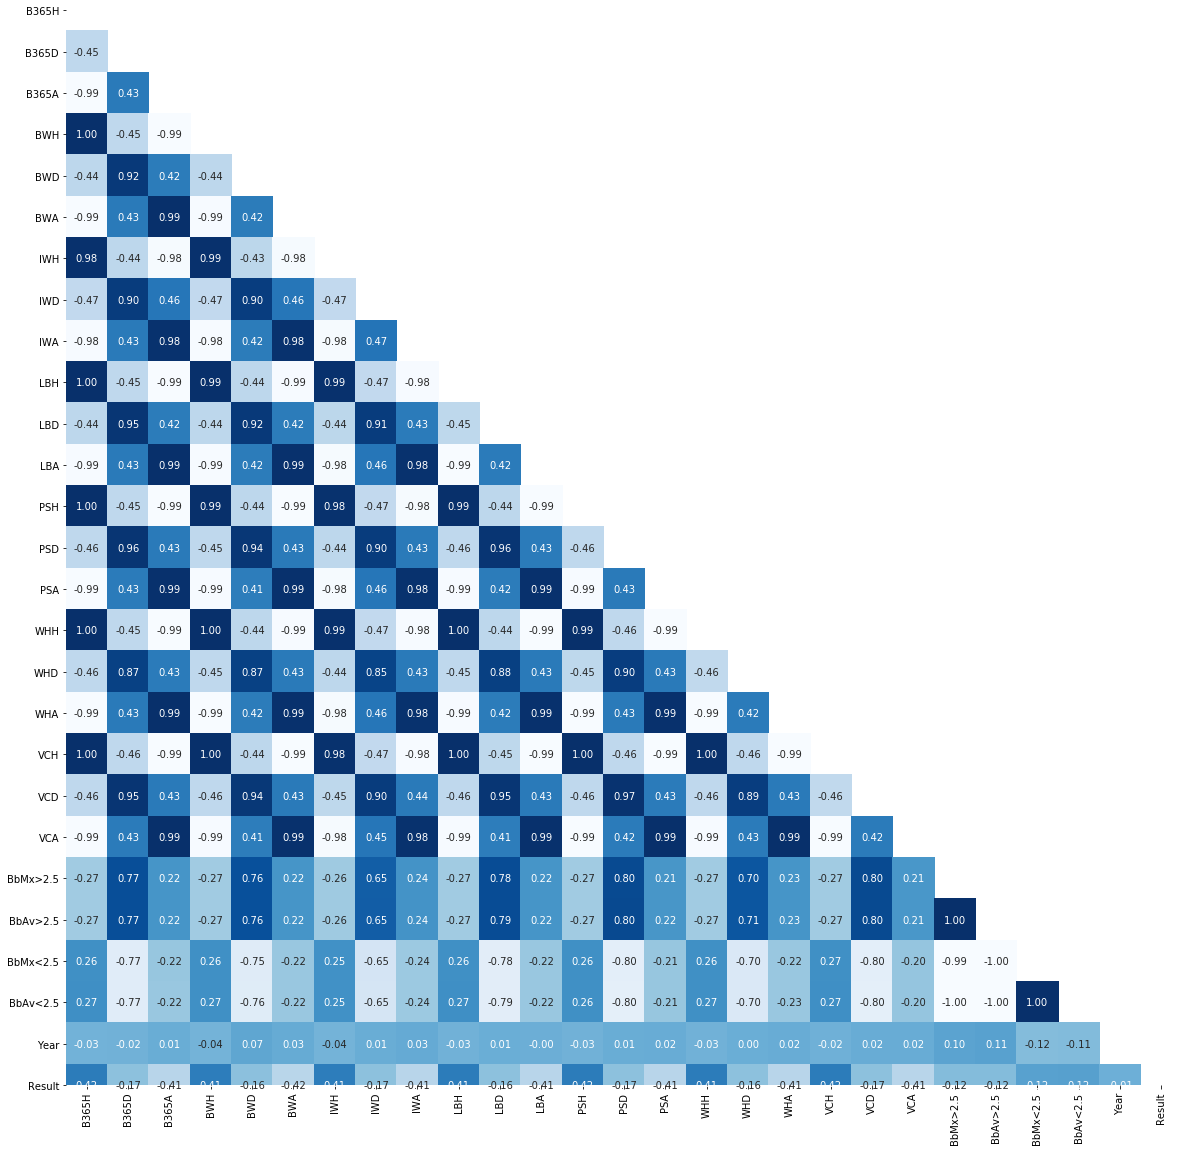

In [0]:
correlation = df_train.corr(method='spearman')
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)
sns.heatmap(correlation, ax=ax, annot=True, mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

Algumas das variáveis com maior correlação entre si são PSH e BWH, PSA e IWA, entre outras variáveis relacionadas com as estatísticas das apostas. Em relação à variável a ser prevista, Result, as que estão maior correlacionadas com ela são B365H, B365A, BWH, IWH, LBH, PSH, VCH e VCA.

### Distribuição das variáveis

Nos dados de treino, como a variável dependente é result, vamos separá-la das outras.

In [0]:
result = df_train['Result']
result.shape

(5729,)

In [0]:
df_train.drop('Result', axis=1, inplace=True)

In [0]:
df_train.shape

(5729, 43)

Faremos um merge dos dados de treino e teste e analisaremos a distribuição das variáveis.

In [0]:
df = pd.concat((df_train, df_test))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c3fa0f940>,
      dtype=object)

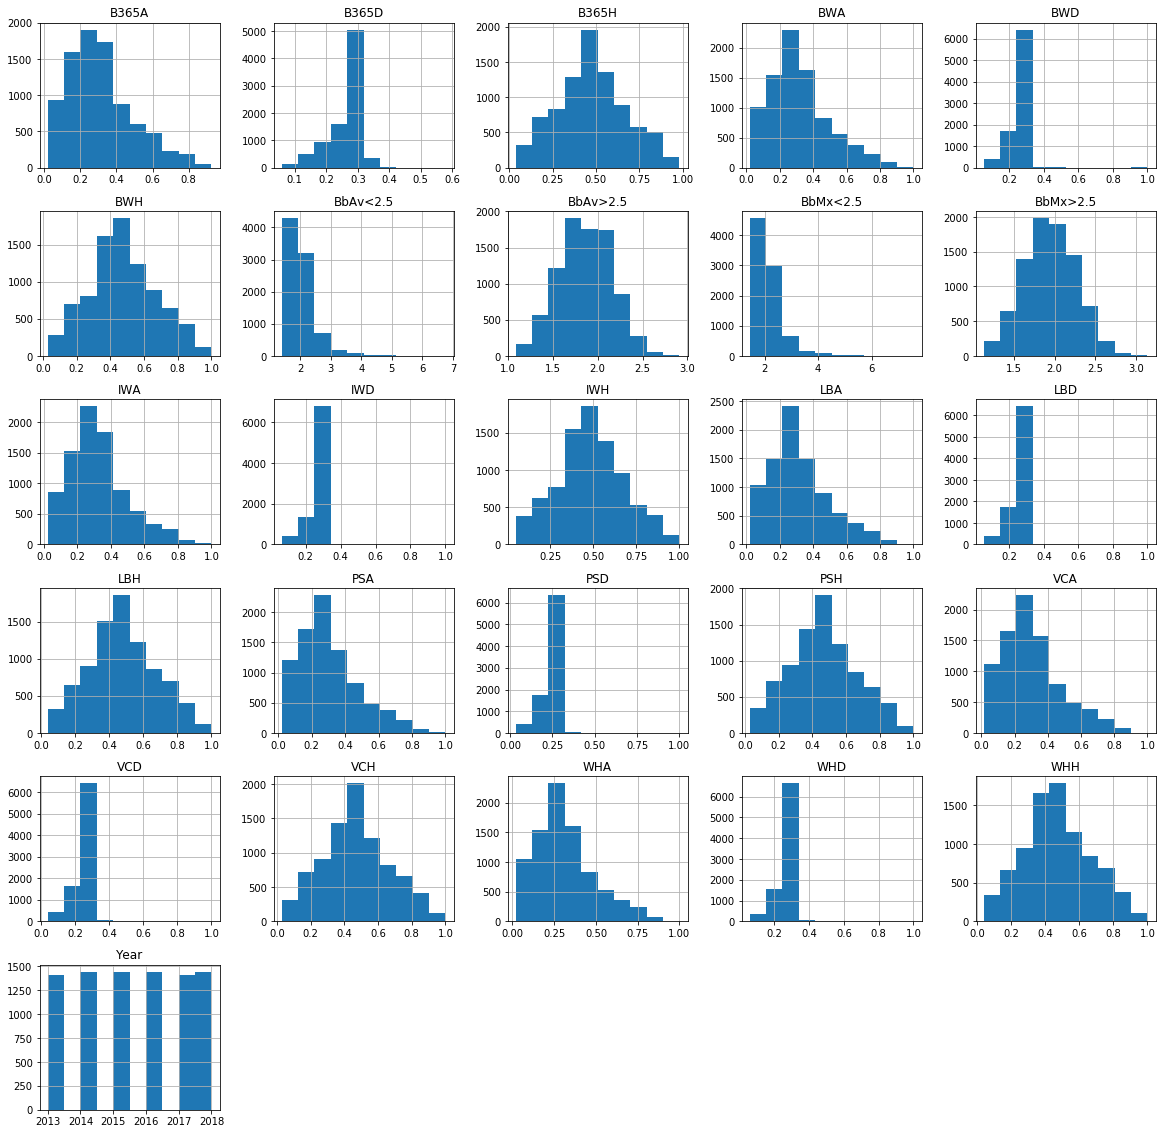

In [0]:
df.hist(grid=True, figsize=(20,20))

Agora iremos normalizar as variáveis, apenas as numéricas.

In [0]:
numericas = df.dtypes[df.dtypes != "object"].index
numericas

Index(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH',
       'VCD', 'VCA', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'Year'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler = standardscaler.fit(df[numericas])
normalizadas_train = standardscaler.transform(df_train[numericas])
normalizadas_test = standardscaler.transform(df_test[numericas])

normalizadas_train = pd.DataFrame(normalizadas_train)
normalizadas_test = pd.DataFrame(normalizadas_test)

normalizadas_train.columns = df_train[numericas].columns
normalizadas_test.columns = df_test[numericas].columns

normalizadas_train.index = df_train[numericas].index
normalizadas_test.index = df_test[numericas].index

In [0]:
df_train[numericas] = normalizadas_train
df_test[numericas] = normalizadas_test

In [0]:
df_train

,ID,League,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Year,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR
0,GER310812#0,Germany,31/08/12,Mainz,Greuther Furth,0.403042,0.449398,-0.508418,0.292290,0.359714,-0.493476,0.385884,0.368610,-0.433499,0.347269,0.340515,-0.493076,0.359075,0.278889,-0.508343,0.386513,0.186406,-0.474426,0.359138,0.228584,-0.503164,0.451247,0.401504,-0.408370,-0.456766,-1.468991,8,3,13,8,2,0,8,3,13,8,2,0
1,GER010912#0,Germany,01/09/12,Fortuna Dusseldorf,M'gladbach,-0.656815,0.766735,0.582943,-0.733083,0.666027,0.661960,-0.713793,0.840140,0.632173,-0.744645,0.490787,0.660652,-0.775588,0.654596,0.623084,-0.708042,0.497782,0.640812,-0.788109,0.646681,0.617853,0.514270,0.469934,-0.479326,-0.518447,-1.468991,9,4,14,0,2,0,9,4,14,0,2,0
2,GER010912#1,Germany,01/09/12,Hoffenheim,Ein Frankfurt,0.062290,0.603400,-0.152055,0.053265,0.666027,-0.310889,0.162873,0.516261,-0.273300,0.109287,0.490787,-0.290899,0.072478,0.401605,-0.234042,0.085322,0.337515,-0.160534,0.093831,0.360207,-0.245706,0.167645,0.230427,-0.390631,-0.353965,-1.468991,14,8,6,4,0,0,14,8,6,4,0,0
3,GER010912#2,Germany,01/09/12,Leverkusen,Freiburg,0.812378,-0.205108,-0.735194,0.712387,-0.158663,-0.668897,0.853489,-0.026456,-0.807297,0.810927,-0.000102,-0.856908,0.741417,-0.247040,-0.742415,0.851292,-0.156108,-0.842840,0.745226,-0.335514,-0.747749,-0.809209,-0.830246,0.478581,0.406767,-1.468991,19,10,22,7,2,0,19,10,22,7,2,0
4,GER010912#3,Germany,01/09/12,Nurnberg,Dortmund,-1.552876,-0.205108,1.865417,-1.581512,-0.272057,1.902289,-1.546882,-0.026456,1.845462,-1.598578,-0.298143,1.899149,-1.533722,-0.292827,1.776943,-1.591654,-0.455808,1.947924,-1.555320,-0.335514,1.857008,-0.368049,-0.351232,-0.018111,0.036681,-1.468991,18,8,20,6,2,0,18,8,20,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,SPA150516#0,Spain,15/05/16,Betis,Getafe,-1.385226,0.036026,1.545908,-1.323294,-0.039300,1.531801,-1.426084,-0.362262,1.729189,-1.313934,-0.062848,1.529208,-1.358454,-0.122730,1.535833,-1.392841,-0.219203,1.784037,-1.354084,-0.126798,1.525623,-0.683164,-0.624954,0.194757,0.221724,0.290803,9,3.2,12.6,3.8,3,0.2,9,3.2,12.6,3.8,3,0.2
5725,SPA150516#1,Spain,15/05/16,Espanol,Eibar,0.123625,0.303953,-0.238738,0.115345,0.219320,-0.135395,0.307529,0.297994,-0.433499,0.174975,0.340515,-0.290899,0.096003,0.339406,-0.237867,0.085322,0.337515,-0.034570,0.093831,0.228584,-0.225967,-0.588629,-0.556523,0.106062,0.139483,0.290803,8.8,3.6,16.2,3.4,3,0,8.8,3.6,16.2,3.4,3,0
5726,SPA150516#2,Spain,15/05/16,Malaga,Las Palmas,0.403042,0.100328,-0.508418,0.351792,0.086516,-0.385474,0.307529,0.297994,-0.433499,0.393932,0.198591,-0.493076,0.359075,0.128937,-0.455422,0.386513,0.337515,-0.365226,0.359138,0.103889,-0.447576,-0.147470,-0.282801,-0.089067,-0.066120,0.290803,14,6.2,14.8,7,2.2,0,14,6.2,14.8,7,2.2,0
5727,SPA150516#3,Spain,15/05/16,Sp Gijon,Villarreal,1.101584,-0.714168,-1.007325,1.105178,-0.609099,-0.992810,1.085679,-0.822440,-0.826715,1.105543,-0.638858,-0.991672,1.077959,-0.653653,-0.980654,1.356424,-0.798421,-1.081647,1.109318,-0.698499,-1.022908,-0.242004,-0.180156,-0.142284,-0.148362,0.290803,8.6,2.6,13.6,4,2.4,0.4,8.6,2.6,13.6,4,2.4,0.4


In [0]:
df_test

,ID,League,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Year,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR
0,ENG010117#0,Germany,09/09/16,Schalke 04,Bayern Munich,-1.888176,-1.454620,2.561784,-1.967161,-1.618005,2.557768,-1.899327,-1.190583,2.396685,-1.940152,-1.362572,2.553659,-1.885628,-1.363723,2.540609,-1.849373,-1.681852,2.610677,-1.902909,-1.460768,2.634735,-1.061300,-1.069752,0.797884,0.674051,0.877401,11,3,15,5,2,0,11,3,15,5,2,0
1,ENG010117#1,Germany,10/09/16,Darmstadt,Ein Frankfurt,-0.714625,0.766735,0.582943,-0.733083,0.666027,0.559270,-0.713793,0.673140,0.431576,-0.744645,0.733535,0.660652,-0.780494,0.682876,0.613488,-0.585757,0.668066,0.494479,-0.752949,0.646681,0.637550,0.640316,0.777871,-0.674455,-0.662369,0.877401,12,3,15,5,3,0,12,3,15,5,3,0
2,ENG01012018#0,Germany,10/09/16,Freiburg,M'gladbach,-0.994042,0.303953,1.050669,-1.054110,0.219320,1.031643,-1.139984,0.368610,1.008293,-0.988626,0.198591,1.029789,-1.017251,0.196861,1.044256,-1.050442,0.668066,0.997721,-0.922865,0.165405,1.018039,-0.620141,-0.624954,0.230235,0.242284,0.877401,8,2,10,2,3,0,8,2,10,2,3,0
3,ENG01012018#1,Germany,10/09/16,Ingolstadt,Hertha,-0.295500,1.125018,-0.001715,-0.352156,1.011865,0.025947,-0.338903,0.673140,0.015584,-0.317679,1.192058,0.025579,-0.342625,1.066777,0.001964,-0.365643,0.849336,0.178266,-0.306837,0.968963,0.071182,2.247398,2.078051,-1.011496,-1.073575,0.877401,13,5,15,5,2,0,13,5,15,5,2,0
4,ENG01012018#2,Germany,10/09/16,Leverkusen,Hamburg,1.077496,-0.714168,-0.953871,0.963773,-0.609099,-0.930519,0.853489,-0.362262,-0.945103,1.105543,-0.638858,-0.991672,1.031939,-0.623673,-0.955849,1.003954,-0.669879,-0.916319,1.109318,-0.698499,-0.922453,-0.494095,-0.488093,-0.000372,0.077802,0.877401,12,6,16,3,3,0,12,6,16,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,SPA310318#0,Spain,19/05/18,Villarreal,Real Madrid,-0.768706,-0.316853,0.917033,-0.787821,-0.482648,0.962515,-0.425877,-0.144283,0.431576,-0.744645,-0.298143,0.895025,-0.692694,-0.292827,0.879910,-0.708042,-0.669879,0.997721,-0.752949,-0.335514,0.952702,-2.006643,-2.061995,3.245868,3.573053,1.463999,14.8,6.4,13.2,5.2,2.2,0,14.8,6.4,13.2,5.2,2.2,0
2844,SPA310318#1,Spain,20/05/18,Ath Bilbao,Espanol,0.074316,0.449398,-0.196600,0.115345,0.359714,-0.310889,0.095969,0.097917,-0.273300,0.109287,0.340515,-0.183088,0.107937,0.231639,-0.182429,0.025670,0.337515,-0.160534,0.155183,0.228584,-0.163462,-0.399561,-0.385447,-0.018111,0.016121,1.463999,12,3.8,14.8,4.6,3.6,0,12,3.8,14.8,4.6,3.6,0
2845,SPA310318#2,Spain,20/05/18,Ath Madrid,Eibar,0.732788,0.036026,-0.820235,0.751666,-0.272057,-0.816770,0.649443,-0.026456,-0.826715,0.749737,-0.183512,-0.771149,0.799391,-0.219041,-0.793498,0.750325,-0.219203,-0.756001,0.844127,-0.233701,-0.747749,-0.242004,-0.145940,-0.195501,-0.148362,1.463999,9.4,3.2,13.6,5.2,2.2,0.2,9.4,3.2,13.6,5.2,2.2,0.2
2846,SPA310318#3,Spain,20/05/18,Barcelona,Sociedad,1.731417,-2.168627,-1.245440,1.742658,-2.254513,-1.262737,1.500942,-1.491791,-1.268221,1.747159,-2.017605,-1.204458,1.681380,-1.968147,-1.103700,1.688753,-1.954306,-1.277034,1.763419,-2.005245,-1.214685,-2.384780,-2.404147,6.438891,6.143091,1.463999,15.2,6.4,8.4,5.8,2,0.4,15.2,6.4,8.4,5.8,2,0.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f104c570710>,
      dtype=object)

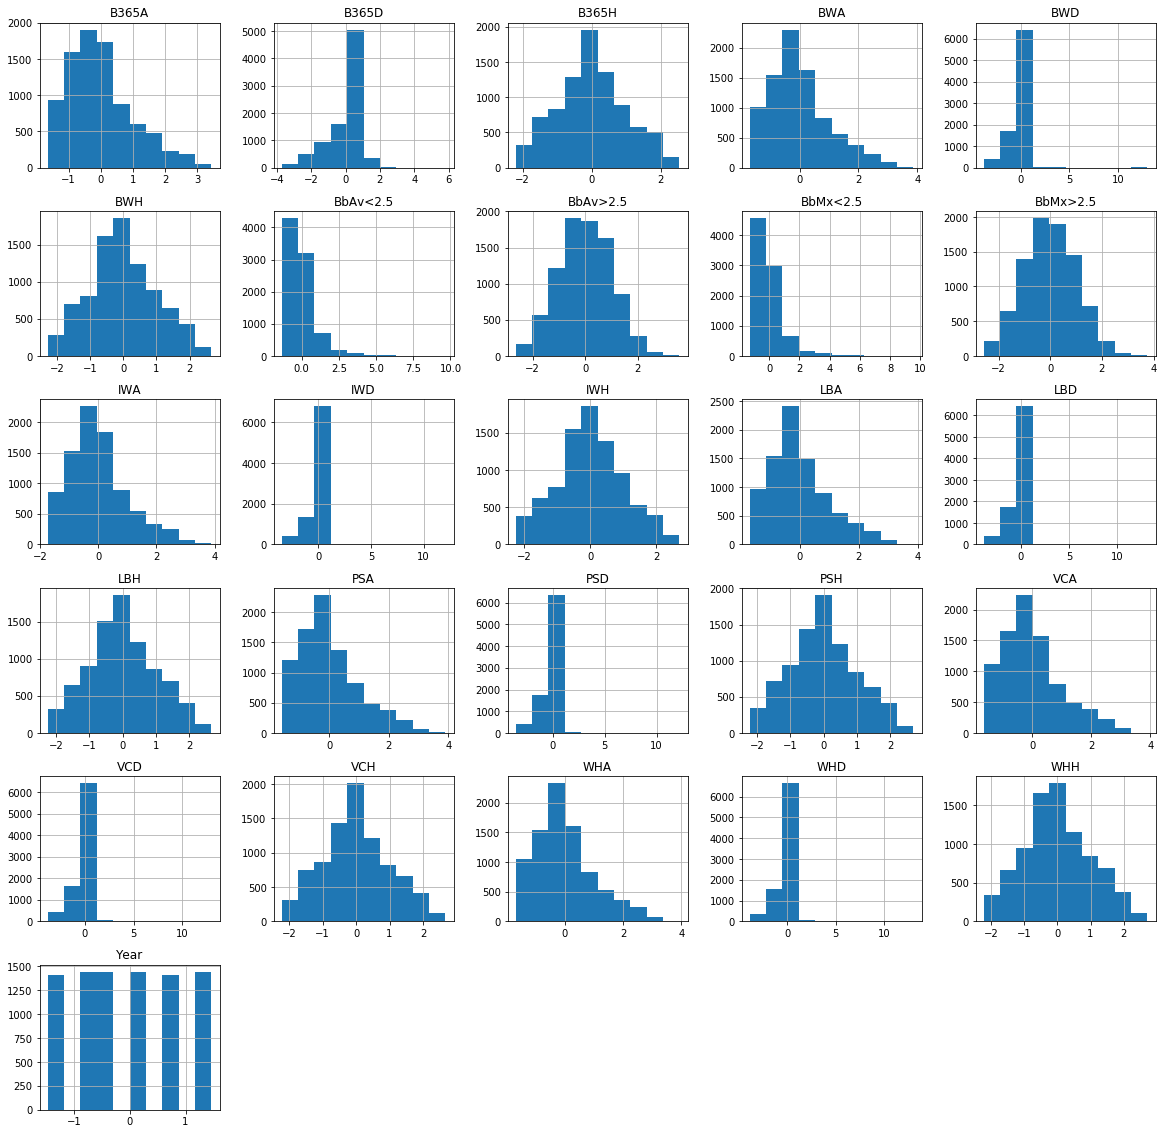

In [0]:
df = pd.concat((df_train, df_test))
df.hist(grid=True, figsize=(20, 20))

Acima vemos a distribuição das variáveis após a normalização

### Valores ausentes

Vamos analisar quantos valores nulos existem por cada coluna do dataframe

In [0]:
df.isnull().sum()

ID          0
League      0
Date        0
HomeTeam    0
AwayTeam    0
B365H       0
B365D       0
B365A       0
BWH         0
BWD         0
BWA         0
IWH         0
IWD         0
IWA         0
LBH         0
LBD         0
LBA         0
PSH         0
PSD         0
PSA         0
WHH         0
WHD         0
WHA         0
VCH         0
VCD         0
VCA         0
BbMx>2.5    0
BbAv>2.5    0
BbMx<2.5    0
BbAv<2.5    0
Year        0
HS          0
HST         0
HF          0
HC          0
HY          0
HR          0
AS          0
AST         0
AF          0
AC          0
AY          0
AR          0
dtype: int64

Não há nenhum valor nulo, então não há necessidade de removê-los

### Garantindo que haja apenas variáveis numéricas

Iremos remover as colunas ID e Date, pois elas parecem ser desnecessárias

In [0]:
df_train.drop(columns=['ID', 'Date'], axis=1, inplace=True)
df_test.drop(columns=['ID', 'Date'], axis=1, inplace=True)

Agora transformaremos as variáveis categóricas em numéricas

In [0]:
df_train['train'] = 1
df_test['train'] = 0

df = pd.concat((df_train, df_test))

In [0]:
df = pd.get_dummies(df)

In [0]:
df_train = df.loc[df['train'] == 1]
df_test = df.loc[df['train'] == 0]

In [0]:
df_train.drop('train', axis=1, inplace=True)
df_test.drop('train', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Possíveis desbalanceamentos entre as classes

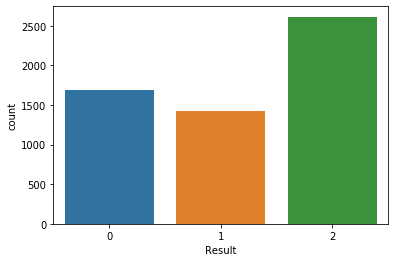

In [0]:
sns.countplot(result)

A classe 2 está um pouco desbalanceada em relação às outras, o que pode enviesar a aprendizagem do modelo.

Como há um número razoável de dados da classe 2 acima das outras 2 classes, cerca de 1000 de diferença para cada uma delas, faremos um over_sampling.

In [0]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
df_balanced, result_balanced = ros.fit_sample(df_train, result)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


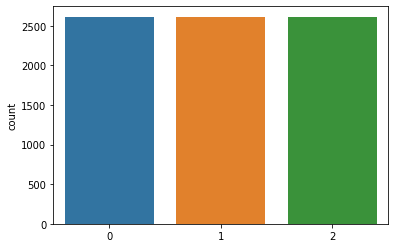

In [0]:
sns.countplot(result_balanced)

In [0]:
df_balanced

array([[ 0.40304169,  0.44939846, -0.50841774, ...,  0.        ,
         0.        ,  0.        ],
       [-0.65681504,  0.76673485,  0.58294288, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06228953,  0.60339995, -0.15205508, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.38522566, -0.20510785,  1.60521823, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59487536,  0.76673485,  0.48939769, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29550024,  0.44939846,  0.28529908, ...,  0.        ,
         1.        ,  0.        ]])

# Parte 2

### Modelo de classificação utilizando regressão logística

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [0]:
def f1_cv(model, x, y):
    f1= f1 = cross_val_score(model, x, y, scoring=make_scorer(f1_score, average='macro'), 
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=3058))
    return(f1)

In [0]:
from sklearn.linear_model import LogisticRegression

O melhor alpha é 6.0, com F1 = 0.4905845258275442


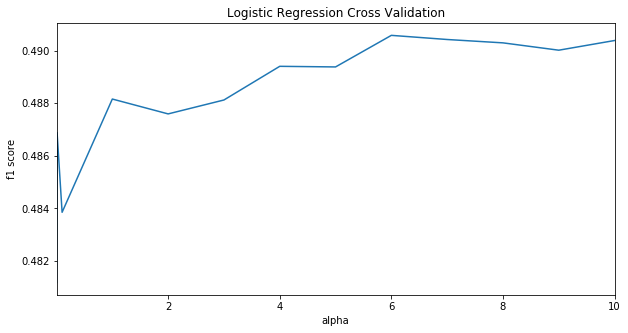

In [0]:
alphas = [1e-03,1e-02,1e-01,1,2,3,4,5,6,7,8,9,10]
cv_logistic = [f1_cv(LogisticRegression(solver="lbfgs", max_iter=10000, C=alpha, multi_class="multinomial"),
                df_balanced, result_balanced).mean() for alpha in alphas]
cv_logistic = pd.Series(cv_logistic, index=alphas)

plt.figure(figsize=(10, 5))
cv_logistic.plot(title="Logistic Regression Cross Validation")
plt.xlabel("alpha")
plt.ylabel("f1 score")
print("O melhor alpha é {0}, com F1 = {1}".format(cv_logistic.idxmax(), cv_logistic.max()))

### Modelo de classificação com árvores de decisão

In [0]:
from sklearn.tree import DecisionTreeClassifier

A profundidade máxima ideal é 49, com F1 = 0.6656289275031171


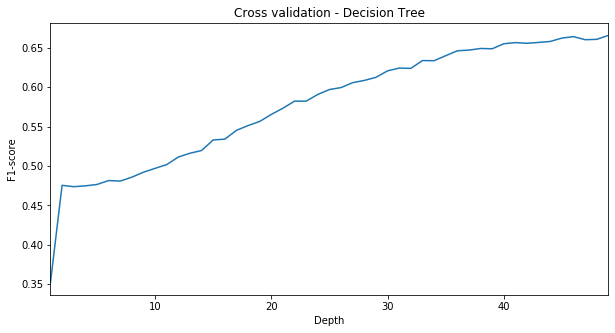

In [0]:
depths = np.arange(1, 50, 1).tolist()
cv_arvore = [f1_cv(DecisionTreeClassifier(max_depth=depth), df_balanced, result_balanced).mean() for depth in depths]
cv_arvore = pd.Series(cv_arvore, index=depths)

plt.figure(figsize=(10, 5))
cv_arvore.plot(title = "Cross validation - Decision Tree")
plt.xlabel("Depth")
plt.ylabel("F1-score")
print("A profundidade máxima ideal é {0}, com F1 = {1}".format(cv_arvore.idxmax(), cv_arvore.max()))

### Modelo de classificação usando KNN

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

A melhor quantidade de vizinhos é 1, com F1 = 0.6567473095527065


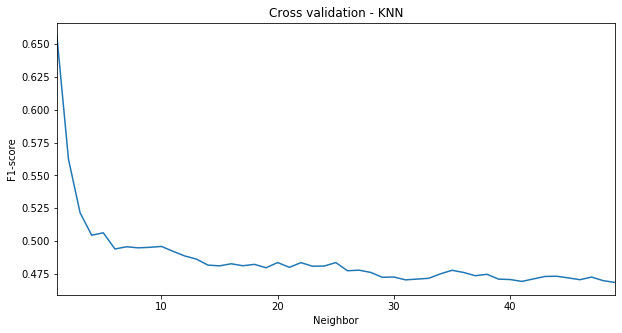

In [0]:
neighbors = np.arange(1,50,1).tolist()
cv_knn = [f1_cv(KNeighborsClassifier(n_neighbors=neighbor), df_balanced, result_balanced).mean() for neighbor in neighbors]
cv_knn = pd.Series(cv_knn, index=neighbors)

plt.figure(figsize=(10, 5))
cv_knn.plot(title = "Cross validation - KNN")
plt.xlabel("Neighbor")
plt.ylabel("F1-score")
print("A melhor quantidade de vizinhos é {0}, com F1 = {1}".format(cv_knn.idxmax(), cv_knn.max()))

### Modelo de classificação usando AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

A melhor quantidade de árvores ideal é 39, com F1 = 0.6922978984902007


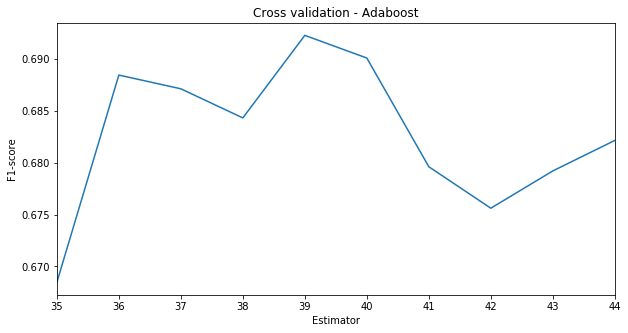

In [0]:
estimators = np.arange(35,45,1).tolist()
cv_adaboost = [f1_cv(AdaBoostClassifier(DecisionTreeClassifier(max_depth=cv_arvore.idxmax()),
                                        algorithm="SAMME", n_estimators=estimator),
                     df_balanced, result_balanced).mean() for estimator in estimators]
cv_adaboost = pd.Series(cv_adaboost, index=estimators)

plt.figure(figsize=(10, 5))
cv_adaboost.plot(title = "Cross validation - Adaboost")
plt.xlabel("Estimator")
plt.ylabel("F1-score")
print("A melhor quantidade de árvores ideal é {0}, com F1 = {1}".format(cv_adaboost.idxmax(), cv_adaboost.max()))

# Parte 3

### Função para calcular as métricas de treino e validação

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [0]:
def report_train_validation(model,x,y):
    kf = KFold(n_splits=5, random_state=None, shuffle=True)
    for train_index, validation_index in kf.split(df_balanced):
        model.fit(x[train_index,:], y[train_index])
        #report train
        predicts_train = model.predict(x[train_index,:])
        report_train = metrics.classification_report(y[train_index], predicts_train, output_dict=True)["macro avg"]
        #report validation
        predicts_validation = model.predict(x[validation_index,:])
        report_validation = metrics.classification_report(y[validation_index], predicts_validation, 
                                                         output_dict=True)["macro avg"]
        #print metrics
        print("Precision = train:{0} - validation:{1}".format(report_train["precision"], report_validation["precision"]))
        print("Recall = train:{0} - validation:{1}".format(report_train["recall"], report_validation["recall"]))
        print("AUC-Precision&Recall = train:{0} - validation:{1}".format(report_train["f1-score"], report_validation["f1-score"]))
        return

### Regressão Logística

In [0]:
logistica = LogisticRegression(solver="lbfgs", max_iter=10000, C=cv_logistic.idxmax(), multi_class="multinomial")
report_train_validation(logistica, df_balanced, result_balanced)

Precision = train:0.6154233945986837 - validation:0.49214443731580837
Recall = train:0.6148454122679047 - validation:0.4887471254352738
AUC-Precision&Recall = train:0.61480194381521 - validation:0.4892885651344307


### Árvore de Decisão

In [0]:
arvore = DecisionTreeClassifier(max_depth=cv_arvore.idxmax())
report_train_validation(arvore, df_balanced, result_balanced)

Precision = train:0.998712377273459 - validation:0.6639984011669632
Recall = train:0.9987330365900388 - validation:0.6663426954704372
AUC-Precision&Recall = train:0.9987208584591151 - validation:0.6591241690294952


### KNN

In [0]:
knn = KNeighborsClassifier(n_neighbors=cv_knn.idxmax())
report_train_validation(knn, df_balanced, result_balanced)

Precision = train:1.0 - validation:0.675491434450978
Recall = train:1.0 - validation:0.6772868721302663
AUC-Precision&Recall = train:1.0 - validation:0.6701418775396147


### AdaBoost

In [0]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=cv_arvore.idxmax()),
                              algorithm="SAMME", n_estimators=cv_adaboost.idxmax())
report_train_validation(adaboost, df_balanced, result_balanced)

Precision = train:0.9710791476227171 - validation:0.6733208082854091
Recall = train:0.9706283866493943 - validation:0.6750287615491669
AUC-Precision&Recall = train:0.9707094865562177 - validation:0.6697794040708467


Como vemos, o desempenho no treino é bem melhor do que na validação, pois na validação há menos enviesamento dos dados, já que o modelo pode se ajustar aos dados de treino, e na validação não.

# Parte 4

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ceciliakemiac/DataScienceMaybeFiles/master/data/lab3_sample_submission.csv')

In [0]:
data.drop('Result', axis=1, inplace=True)

### Predição com Árvore de Decisão

In [0]:
model_arvore = DecisionTreeClassifier(max_depth=cv_arvore.idxmax())
model_arvore.fit(df_balanced, result_balanced)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=49,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
arvore_predict = model_arvore.predict(df_test)

In [0]:
data['Category'] = arvore_predict
data.to_csv('arvore.csv', index=False)

### Predição do AdaBoost

In [0]:
model_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=cv_arvore.idxmax()),
                              algorithm="SAMME", n_estimators=cv_adaboost.idxmax())
model_adaboost.fit(df_balanced, result_balanced)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=49,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                              

In [0]:
adaboost_predict = model_adaboost.predict(df_test)

In [0]:
data.Category = adaboost_predict
data.to_csv('adaboost.csv', index=False)

### Predição com RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model_randomforest = RandomForestClassifier(max_depth=10, random_state=0)
model_randomforest.fit(df_balanced, result_balanced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
randomforest_predict = model_randomforest.predict(df_test)

In [0]:
data.Category = randomforest_predict
data.to_csv('randomforest.csv', index=False)